## Importing Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:
# loading the dataset to pandas DataFrame
credit_dataset = pd.read_csv("Credit_dataset.csv")

In [4]:
credit_dataset

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents
0,1,1,18,4,1049,1,2,21,3,1,1,3,1
1,1,1,9,4,2799,1,3,36,3,1,2,3,2
2,1,2,12,2,841,2,4,23,3,1,1,2,1
3,1,1,12,4,2122,1,3,39,3,1,2,2,2
4,1,1,12,4,2171,1,3,38,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,1987,1,3,21,3,1,1,2,2
996,0,1,24,2,2303,1,5,45,3,2,1,3,1
997,0,4,21,4,12680,5,5,30,3,3,1,4,1
998,0,2,12,2,6468,5,1,52,3,2,1,4,1


In [5]:
credit_dataset['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [6]:
# number of missing values in each column
credit_dataset.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
dtype: int64

In [7]:
credit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Credit Amount                      1000 non-null   int64
 5   Value Savings/Stocks               1000 non-null   int64
 6   Length of current employment       1000 non-null   int64
 7   Age (years)                        1000 non-null   int64
 8   Concurrent Credits                 1000 non-null   int64
 9   Type of apartment                  1000 non-null   int64
 10  No of Credits at this Bank         1000 non-null   int64
 11  Occupation                         1000 non-null   int64
 12  No of dependents     

## Data Visualization

<AxesSubplot:xlabel='Creditability', ylabel='count'>

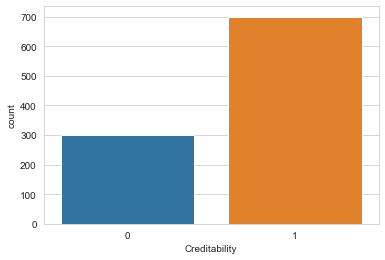

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Creditability',data=credit_dataset)

<AxesSubplot:xlabel='Account Balance', ylabel='count'>

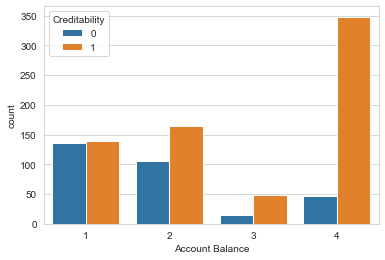

In [9]:
# Account Balance & Creditability
sns.countplot(x='Account Balance',hue='Creditability',data=credit_dataset)

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

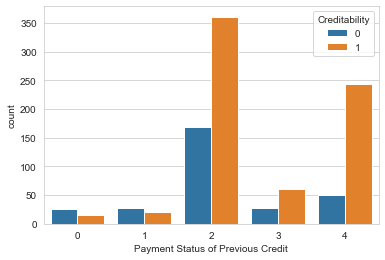

In [10]:
# Account Balance & Creditability
sns.countplot(x='Payment Status of Previous Credit',hue='Creditability',data=credit_dataset)

<AxesSubplot:xlabel='No of dependents', ylabel='count'>

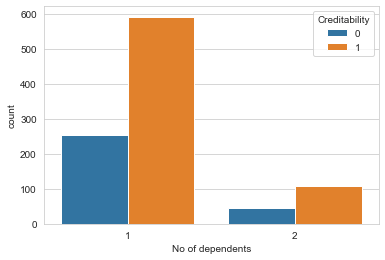

In [11]:
# Dependents & Creditability
sns.countplot(x='No of dependents',hue='Creditability',data=credit_dataset)

In [12]:
# separating the data and label
X = credit_dataset.drop(columns=['Creditability'],axis=1)
Y = credit_dataset['Creditability']
print(X)
print(Y)

     Account Balance  Duration of Credit (month)  \
0                  1                          18   
1                  1                           9   
2                  2                          12   
3                  1                          12   
4                  1                          12   
..               ...                         ...   
995                1                          24   
996                1                          24   
997                4                          21   
998                2                          12   
999                1                          30   

     Payment Status of Previous Credit  Credit Amount  Value Savings/Stocks  \
0                                    4           1049                     1   
1                                    4           2799                     1   
2                                    2            841                     2   
3                                    4           2122      

## Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset.

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [14]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.13330536 0.1380837  0.07604869 0.14897405 0.06599803 0.08641075
 0.13193354 0.03434273 0.05225667 0.04099023 0.06444065 0.0272156 ]


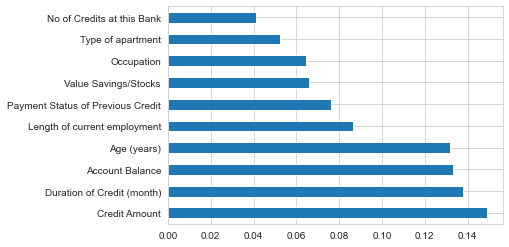

In [15]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Data Standardization

In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
standardized_data=scaler.transform(X)
print(standardized_data)

[[-1.25456565 -0.24085723  1.34401408 ... -0.704926    0.14694918
  -0.42828957]
 [-1.25456565 -0.9875727   1.34401408 ...  1.02707891  0.14694918
   2.33486893]
 [-0.45902624 -0.73866754 -0.50342796 ... -0.704926   -1.38377145
  -0.42828957]
 ...
 [ 1.13205258  0.00804793  1.34401408 ... -0.704926    1.67766981
  -0.42828957]
 [-0.45902624 -0.73866754 -0.50342796 ... -0.704926    1.67766981
  -0.42828957]
 [-1.25456565  0.75476341 -0.50342796 ... -0.704926    0.14694918
  -0.42828957]]


In [19]:
X=standardized_data
Y=credit_dataset['Creditability']

In [20]:
#Splitting Data into Train and Test
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 12) (700, 12) (300, 12)


## Model Training

k-nearest neighbor Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier()
kmodel.fit(X_train,Y_train)
y_predict=kmodel.predict(X_test)

In [23]:
print("f1 Score:",f1_score(Y_test,y_predict))
print("Accuracy:",accuracy_score(Y_test,y_predict))
print("Precision Score:",precision_score(Y_test,y_predict))
print("Recall Score:",recall_score(Y_test,y_predict))
pd.crosstab(Y_test,y_predict)

f1 Score: 0.8109339407744877
Accuracy: 0.7233333333333334
Precision Score: 0.777292576419214
Recall Score: 0.8476190476190476


col_0,0,1
Creditability,,
0,39,51
1,32,178


Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
y_predict1=model1.predict(X_test)

In [25]:
print("f1 Score:",f1_score(Y_test,y_predict1))
print("Accuracy:",accuracy_score(Y_test,y_predict1))
print("Precision Score:",precision_score(Y_test,y_predict1))
print("Recall Score:",recall_score(Y_test,y_predict1))
pd.crosstab(Y_test,y_predict1)

f1 Score: 0.8285077951002227
Accuracy: 0.7433333333333333
Precision Score: 0.7782426778242678
Recall Score: 0.8857142857142857


col_0,0,1
Creditability,,
0,37,53
1,24,186


Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train, Y_train)
y_predict2=tree.predict(X_test)

In [27]:
print("f1 Score:",f1_score(Y_test,y_predict2))
print("Accuracy:",accuracy_score(Y_test,y_predict2))
print("Precision Score:",precision_score(Y_test,y_predict2))
print("Recall Score:",recall_score(Y_test,y_predict2))
pd.crosstab(Y_test,y_predict2)

f1 Score: 0.7317073170731706
Accuracy: 0.6333333333333333
Precision Score: 0.75
Recall Score: 0.7142857142857143


col_0,0,1
Creditability,,
0,40,50
1,60,150


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(X_train, Y_train)
y_predict3=tree.predict(X_test)

In [29]:
print("f1 Score:",f1_score(Y_test,y_predict3))
print("Accuracy:",accuracy_score(Y_test,y_predict3))
print("Precision Score:",precision_score(Y_test,y_predict3))
print("Recall Score:",recall_score(Y_test,y_predict3))
pd.crosstab(Y_test,y_predict3)

f1 Score: 0.7317073170731706
Accuracy: 0.6333333333333333
Precision Score: 0.75
Recall Score: 0.7142857142857143


col_0,0,1
Creditability,,
0,40,50
1,60,150


SVM Model

In [30]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)
y_predict4=tree.predict(X_test)

In [31]:
print("f1 Score:",f1_score(Y_test,y_predict4))
print("Accuracy:",accuracy_score(Y_test,y_predict4))
print("Precision Score:",precision_score(Y_test,y_predict4))
print("Recall Score:",recall_score(Y_test,y_predict4))
pd.crosstab(Y_test,y_predict4)

f1 Score: 0.7317073170731706
Accuracy: 0.6333333333333333
Precision Score: 0.75
Recall Score: 0.7142857142857143


col_0,0,1
Creditability,,
0,40,50
1,60,150


Comment: From above Models Logistic Regression is the best Model as it has high f1 score and accuracy

## Predictive Model

In [32]:
input_data=(1,9,4,2799,1,3,36,3,1,2,3,2)	
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=model1.predict(std_data)
print(prediction)
if prediction==1:
  print("Good Credit")
else:
  print("Bad Credit")

[1]
Good Credit


In [33]:
input_data=(1	,24	,2,	1987	,1,	3,	21,	3	,1,	1	,2	,	2)	
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=model1.predict(std_data)
print(prediction)
if prediction==1:
  print("Good Credit")
else:
  print("Bad Credit")

[0]
Bad Credit


## Save Model

In [34]:
import joblib
joblib.dump(model1,"Creditability.pkl")

['Creditability.pkl']

In [35]:
model=joblib.load("Creditability.pkl")

## Prediction 

In [158]:
df=pd.read_csv("Credit dataset_test.csv")
df

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents
0,0,18,4,1049,0,1,21,3,1,1,3,5
1,200,9,4,2799,0,2,36,3,1,2,3,2
2,0,12,2,841,90,6,23,3,1,1,2,6


In [159]:
#Account Balance
df['Account Balance'] = np.where((df['Account Balance'] > 0) & (df['Account Balance'] < 200) ,3, df['Account Balance'])
df['Account Balance'] = np.where(df['Account Balance'] == 0, 1, df['Account Balance'])
df['Account Balance'] = np.where(df['Account Balance'] >= 200, 4, df['Account Balance'])

In [160]:
#Value Savings/Stocks
df['Value Savings/Stocks']=np.where((df['Value Savings/Stocks'] >0) & (df['Value Savings/Stocks'] <100),2, df['Value Savings/Stocks'])
df['Value Savings/Stocks']=np.where((df['Value Savings/Stocks'] >=100) & (df['Value Savings/Stocks'] <500) ,3, df['Value Savings/Stocks'])
df['Value Savings/Stocks']=np.where((df['Value Savings/Stocks'] >=500) & (df['Value Savings/Stocks'] <1000) ,4, df['Value Savings/Stocks'])
df['Value Savings/Stocks']=np.where(df['Value Savings/Stocks'] >=1000 ,5, df['Value Savings/Stocks'])
df['Value Savings/Stocks']=np.where(df['Value Savings/Stocks'] == 0 ,1, df['Value Savings/Stocks'])


In [161]:
#Length of current employment
df['Length of current employment']=np.where((df['Length of current employment'] >1) & (df['Length of current employment'] <=4) ,3, df['Length of current employment'])
df['Length of current employment']=np.where((df['Length of current employment'] >4) & (df['Length of current employment'] <=7) ,4, df['Length of current employment'])
df['Length of current employment']=np.where((df['Length of current employment'] >0) & (df['Length of current employment'] <=1),2, df['Length of current employment'])
df['Length of current employment']=np.where(df['Length of current employment'] >7 ,5, df['Length of current employment'])
df['Length of current employment']=np.where(df['Length of current employment'] == 0 ,1, df['Length of current employment'])


In [162]:
#No of Credits at this Bank
df['No of Credits at this Bank']=np.where((df['No of Credits at this Bank']==2) | (df['No of Credits at this Bank'] ==3) ,2, df['No of Credits at this Bank'])
df['No of Credits at this Bank']=np.where((df['No of Credits at this Bank']==4) | (df['No of Credits at this Bank'] ==5) ,3, df['No of Credits at this Bank'])
df['No of Credits at this Bank']=np.where(df['No of Credits at this Bank']>=6 ,4, df['No of Credits at this Bank'])
df['No of Credits at this Bank']=np.where(df['No of Credits at this Bank']==1 ,1, df['No of Credits at this Bank'])


In [163]:
#No of dependents
df['No of dependents']=np.where((df['No of dependents']>=0) & (df['No of dependents']<=2) ,2, df['No of dependents'])
df['No of dependents']=np.where(df['No of dependents']>=3,1, df['No of dependents'])


In [1]:
df

NameError: name 'df' is not defined

In [165]:
std_data=scaler.transform(df)
std_data

array([[-1.25456565, -0.24085723,  1.34401408, -0.78765692, -0.69970702,
        -1.14597811, -1.28157308,  0.46083068, -1.75120525, -0.704926  ,
         0.14694918, -0.42828957],
       [ 1.13205258, -0.9875727 ,  1.34401408, -0.16738429, -0.69970702,
        -0.31795924,  0.04036312,  0.46083068, -1.75120525,  1.02707891,
         0.14694918,  2.33486893],
       [-1.25456565, -0.73866754, -0.50342796, -0.86138075, -0.066488  ,
         0.51005962, -1.10531492,  0.46083068, -1.75120525, -0.704926  ,
        -1.38377145, -0.42828957]])

In [167]:
result=model.predict(std_data)
print(result)

[1 1 1]
